# IMDB Movie Review: Binary Classification <a class="anchor" id="imdb-home-anchor"></a>
* [Loading the Data](#imdb-load-anchor)
* [Data Manipulation](#imdb-data-anchor)
* [Building the Model](#imdb-build-anchor)
* [Evaluating the Model](#imdb-evaluate-anchor)

In this notebook, I will walk you through the process of loading data, building a neural network model and interpreting its metrics.
The task at hand is to clssify whether a review from the **IMDB** website is positive or negative.
## Loading the Data <a class="anchor" id="imdb-load-anchor"></a>
[home](#imdb-home-anchor)

We will take the imdb set from the keras package which will download the dataset on your machine. The dataset consists of 50,000 reviews, split into 25,000 training set and 25,000 test set, in both sets 50% of the samples are with a positive label (labeled 1) and 50% of the samples are with a negative label (labeled 0). Each review in the dataset is already processed for us, the reviews have been turned into a sequence of integers where each integers corresponds to a word in a dictionary.

In [1]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

/opt/anaconda3/envs/teXnet_predictor_gpu_env/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/opt/anaconda3/envs/teXnet_predictor_gpu_env/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [2]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

## Data Manipulation <a class="anchor" id="imdb-data-anchor"></a>
[home](#imdb-home-anchor)

We see that each sample is a list of integers, we want to pass to the model a matrix, so we will turn our training set into a matrix (25000,10000), the value of each postion will be either 1 or 0, depending on the occurence of each word.
For maximum clarity, we will write the function ourselves.

In [3]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences),dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [4]:
x_train = vectorize_sequences(train_data)
x_test  = vectorize_sequences(test_data)

In [5]:
y_train = np.asarray(train_labels).astype('float32')
y_test  = np.asarray(test_labels).astype('float32')

In [6]:
y_train.shape

(25000,)

## Building the Model <a class="anchor" id="imdb-build-anchor"></a>
[home](#imdb-home-anchor)

We will use **keras** in order to build a neural network. Our network will consist of an input layer, an output layer and two hidden layers with 16 nodes each. Note that we have to specify the input shape only for the input layer, keras deals with the rest. We should also specify the activation function. If you are not familiar with *relu* and *sigmoid*, you can check them online, they are both non-linear functions. 

In [7]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In the compiler you specify the loss function, the optimizer method and the metrics you want to observe. Again, if you are not familiar with the specified optimizer/loss function, you can look at their definitions online. 

In [8]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [9]:
###---Equivalent to the compiler above---###

from keras import losses 
from keras import metrics
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

We will take 10000 examples from the training set in order to follow the loss and accuracy of the model, while training, on data it hasn't observed.

In [10]:
x_val           = x_train[:10000]
partial_x_train = x_train[10000:]
y_val           = y_train[:10000]
partial_y_train = y_train[10000:]

In [11]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 2s 58ms/step - loss: 0.5009 - binary_accuracy: 0.7788 - val_loss: 0.3870 - val_binary_accuracy: 0.8467
Epoch 2/20
30/30 [==============================] - 2s 61ms/step - loss: 0.2894 - binary_accuracy: 0.9047 - val_loss: 0.2996 - val_binary_accuracy: 0.8841
Epoch 3/20
30/30 [==============================] - 1s 44ms/step - loss: 0.2131 - binary_accuracy: 0.9301 - val_loss: 0.2824 - val_binary_accuracy: 0.8879
Epoch 4/20
30/30 [==============================] - 1s 48ms/step - loss: 0.1685 - binary_accuracy: 0.9449 - val_loss: 0.2956 - val_binary_accuracy: 0.8797
Epoch 5/20
30/30 [==============================] - 1s 30ms/step - loss: 0.1313 - binary_accuracy: 0.9585 - val_loss: 0.3054 - val_binary_accuracy: 0.8787
Epoch 6/20
30/30 [==============================] - 1s 30ms/step - loss: 0.1095 - binary_accuracy: 0.9669 - val_loss: 0.2979 - val_binary_accuracy: 0.8864
Epoch 7/20
30/30 [==============================] - 1s 32ms/step - los

In [12]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

## Evaluating the Model <a class="anchor" id="imdb-evaluate-anchor"></a>
[home](#imdb-home-anchor)

The graphs plotted below are self-explanatory. It is normal for training loss and accuracy to keep increaing since the model gets better and better on information it has already seen, but when it comes to validation data, we see that after approxiamtely 4-5 epochs, the model begins to overfit, so we should retrain the model on 4 epochs as this will be the optimal, given this architecture.

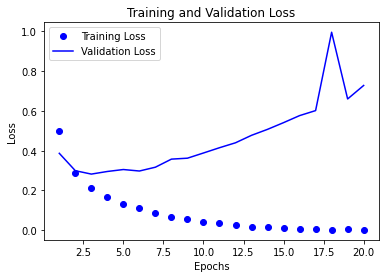

In [13]:
import matplotlib.pyplot as plt

loss_values     = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1,len(loss_values)+1)

plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

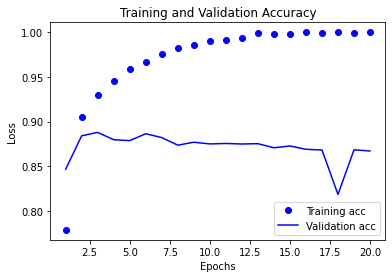

In [14]:
plt.clf()
acc     = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [15]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [16]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 0s 9ms/step - loss: 0.4550 - accuracy: 0.8218
Epoch 2/4
49/49 [==============================] - 0s 9ms/step - loss: 0.2624 - accuracy: 0.9086
Epoch 3/4
49/49 [==============================] - 0s 9ms/step - loss: 0.2019 - accuracy: 0.9278
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.3093 - accuracy: 0.8770


In [18]:
results

[0.30927547812461853, 0.8769999742507935]

In [17]:
model.predict(x_test)

array([[0.15717432],
       [0.9997253 ],
       [0.6036252 ],
       ...,
       [0.09608491],
       [0.051028  ],
       [0.47259954]], dtype=float32)